In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = 'googleplaystore.csv (2).zip' 
df = pd.read_csv(file_path)

In [3]:
print(df.head())
print(df.info())

                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend 

In [4]:
df = df.dropna() 
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int) 
df['Last Updated'] = pd.to_datetime(df['Last Updated'])  


In [5]:
filtered_df = df[(df['Content Rating'] == 'Teen') & (df['App'].str.startswith('E')) & (df['Installs'] > 10000)]

In [6]:
time_series_df = (filtered_df.groupby(['Category', pd.Grouper(key='Last Updated', freq='M')]).agg({'Installs': 'sum'})
                  .reset_index())

In [7]:
time_series_df['MoM Growth'] = (time_series_df.groupby('Category')['Installs'].pct_change() * 100)

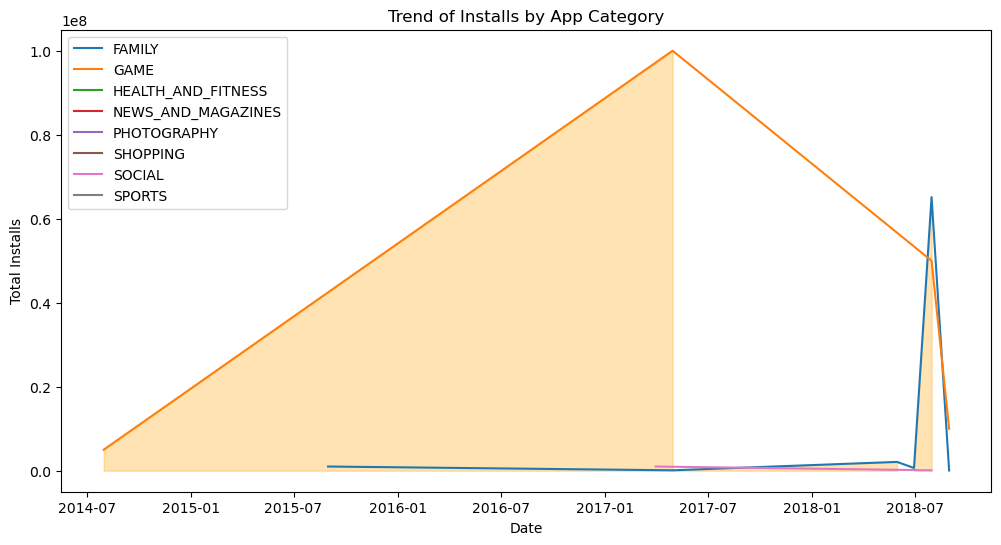

In [11]:
plt.figure(figsize=(12, 6))
for category in time_series_df['Category'].unique():
    category_data = time_series_df[time_series_df['Category'] == category]
    plt.plot(category_data['Last Updated'], category_data['Installs'], label=category)
    for i in range(1, len(category_data)):
        if category_data['MoM Growth'].iloc[i] > 20:
            plt.fill_between(
                [category_data['Last Updated'].iloc[i - 1], category_data['Last Updated'].iloc[i]],0,
                [category_data['Installs'].iloc[i - 1], category_data['Installs'].iloc[i]],color='orange',alpha=0.3
            )
plt.title('Trend of Installs by App Category')
plt.xlabel('Date')
plt.ylabel('Total Installs')
plt.legend()
plt.show()